In [113]:
import pandas as pd
from matplotlib import pyplot as plt

In [114]:
data = pd.read_csv('D3.csv')

In [ ]:
df = data.copy()

In [116]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [118]:
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [119]:
#out = df[df['classification']=='ckd\t'].index
#df.drop(out,axis=0,inplace=True)

In [120]:
df.drop("id",axis=1,inplace=True)

In [121]:
df.skew()

C:\Users\HP\AppData\Local\Temp\ipykernel_22084\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age     -0.668259
bp       1.605429
sg      -0.172444
al       0.998157
su       2.464262
bgr      2.010773
bu       2.634374
sc       7.509538
sod     -6.996569
pot     11.582956
hemo    -0.335095
dtype: float64

In [122]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [123]:
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [124]:
#consider by 0.5
mean1 = ['sg','hemo']
median1 = ['age','bp','al','su','bgr','bu','sc','sod','pot']

In [125]:
for m in mean1:
    df[m].fillna(df[m].mean(),inplace=True)

In [126]:
for m in median1:
    df[m].fillna(df[m].median(),inplace=True)

In [127]:
trans = ['pcv','wc','rc']
for tr in trans:
    df[tr] = pd.to_numeric(df[tr],errors='coerce')

In [128]:
df[trans].skew()

pcv   -0.433679
wc     1.621589
rc    -0.183329
dtype: float64

In [129]:
df['pcv'].fillna(df['pcv'].mean(),inplace=True)
df['wc'].fillna(df['wc'].median(),inplace=True)
df['rc'].fillna(df['rc'].mean(),inplace=True)

In [130]:
cols = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [131]:
df[cols].fillna(df[cols].mode(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_22084\1884342562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols].fillna(df[cols].mode(),inplace=True)


In [132]:
df.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [133]:
df['classification'] = le.fit_transform(df['classification'])

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    int32  
 6   pc              400 non-null    int32  
 7   pcc             400 non-null    int32  
 8   ba              400 non-null    int32  
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    float64
 17  rc              400 non-null    flo

In [135]:
df[['age','bp','al','su','bgr','bu','sod','pcv','wc']] =df[['age','bp','al','su','bgr','bu','sod','pcv','wc']].astype(int)

In [136]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,2,1,0,0,121,...,44,7800,5.200000,1,4,1,0,0,0,0
1,7,50,1.020,4,0,2,1,0,0,121,...,38,6000,4.707435,0,3,1,0,0,0,0
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,4.707435,0,4,1,1,0,1,0
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3.900000,1,3,1,1,1,1,0
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4.600000,0,3,1,0,0,0,0


In [137]:
df['classification'].value_counts()

0    248
2    150
1      2
Name: classification, dtype: int64

In [138]:
# Get the index labels of rows that meet the condition
#rows_to_drop = df[df['classification'] == 1].index

# Use the drop method to remove rows by their index labels
#df = df.drop(rows_to_drop)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    int32  
 1   bp              400 non-null    int32  
 2   sg              400 non-null    float64
 3   al              400 non-null    int32  
 4   su              400 non-null    int32  
 5   rbc             400 non-null    int32  
 6   pc              400 non-null    int32  
 7   pcc             400 non-null    int32  
 8   ba              400 non-null    int32  
 9   bgr             400 non-null    int32  
 10  bu              400 non-null    int32  
 11  sc              400 non-null    float64
 12  sod             400 non-null    int32  
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    int32  
 16  wc              400 non-null    int32  
 17  rc              400 non-null    flo

In [140]:
# Round the float values to two decimal places
df[['sg','sc','pot','hemo','rc']] = df[['sg','sc','pot','hemo','rc']].round(2)

In [141]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df = scaler.transform(df)

In [142]:
data.drop("id",axis=1,inplace=True)

In [143]:
df = pd.DataFrame(df,columns=data.columns)

In [144]:
from sklearn.model_selection import train_test_split
X = df.drop(['classification'],axis=1)
Y = df['classification']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [145]:
X_train.shape

(320, 24)

In [146]:
X_train

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
323,0.465909,0.230769,1.0,0.0,0.0,0.5,0.5,0.0,0.0,0.230769,...,0.870748,0.800000,0.231405,0.406780,0.0,0.6,0.333333,0.0,0.0,0.0
204,0.715909,0.307692,0.5,0.8,0.4,0.5,0.5,0.0,0.0,0.320513,...,0.387755,0.488889,0.239669,0.442373,0.5,0.8,0.333333,0.0,0.5,0.5
251,0.238636,0.230769,1.0,0.0,0.0,0.5,0.5,0.0,0.0,0.102564,...,0.945578,0.955556,0.314050,0.491525,0.0,0.6,0.333333,0.0,0.0,0.0
26,0.829545,0.230769,0.5,0.0,0.0,1.0,0.5,0.0,0.0,0.286325,...,0.578231,0.577778,0.334711,0.322034,0.5,0.8,0.333333,0.5,0.0,0.0
319,0.318182,0.076923,1.0,0.0,0.0,0.5,0.5,0.0,0.0,0.247863,...,0.641497,0.644444,0.239669,0.442373,0.0,0.6,0.333333,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.511364,0.076923,1.0,0.0,0.0,0.5,0.5,0.0,0.0,0.245726,...,0.714286,0.777778,0.235537,0.406780,0.0,0.6,0.333333,0.0,0.0,0.0
237,0.886364,0.153846,0.5,0.4,0.4,1.0,0.5,0.0,0.0,0.254274,...,0.653061,0.688889,0.305785,0.442373,0.5,0.8,0.333333,0.5,0.5,0.0
371,0.295455,0.076923,1.0,0.0,0.0,0.5,0.5,0.0,0.0,0.121795,...,0.986395,0.933333,0.177686,0.491525,0.0,0.6,0.333333,0.0,0.0,0.0
326,0.511364,0.076923,1.0,0.0,0.0,0.5,0.5,0.0,0.0,0.185897,...,0.863946,0.711111,0.252066,0.525424,0.0,0.6,0.333333,0.0,0.0,0.0


In [156]:
#ANN
import tensorflow as tf
from tensorflow import keras

In [157]:
model = keras.models.Sequential()
activation = 'relu'
model.add(keras.layers.Flatten(input_shape=[24]))
model.add(keras.layers.Dense(24,activation=activation))
model.add(keras.layers.Dense(12,activation=activation))
model.add(keras.layers.Dense(3,activation="softmax"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 24)                0         
                                                                 
 dense_22 (Dense)            (None, 24)                600       
                                                                 
 dense_23 (Dense)            (None, 12)                300       
                                                                 
 dense_24 (Dense)            (None, 3)                 39        
                                                                 
Total params: 939 (3.67 KB)
Trainable params: 939 (3.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [158]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [159]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 300,callbacks=early_stopping)

Epoch 1/300
10/10 [==============================] - 1s 41ms/step - loss: 1.1430 - accuracy: 0.2313 - val_loss: 1.0892 - val_accuracy: 0.4500
Epoch 2/300
10/10 [==============================] - 0s 13ms/step - loss: 1.0280 - accuracy: 0.5969 - val_loss: 0.9904 - val_accuracy: 0.5625
Epoch 3/300
10/10 [==============================] - 0s 14ms/step - loss: 0.9318 - accuracy: 0.6313 - val_loss: 0.9029 - val_accuracy: 0.5750
Epoch 4/300
10/10 [==============================] - 0s 10ms/step - loss: 0.8479 - accuracy: 0.6281 - val_loss: 0.8267 - val_accuracy: 0.5875
Epoch 5/300
10/10 [==============================] - 0s 13ms/step - loss: 0.7763 - accuracy: 0.6281 - val_loss: 0.7629 - val_accuracy: 0.5875
Epoch 6/300
10/10 [==============================] - 0s 12ms/step - loss: 0.7168 - accuracy: 0.6281 - val_loss: 0.7099 - val_accuracy: 0.5875
Epoch 7/300
10/10 [==============================] - 0s 14ms/step - loss: 0.6660 - accuracy: 0.6281 - val_loss: 0.6636 - val_accuracy: 0.5875
Epoch 

3/3 [==============================] - 0s 5ms/step
accuracy : 0.9875
precision : 0.9895833333333333
recall : 0.9848484848484849


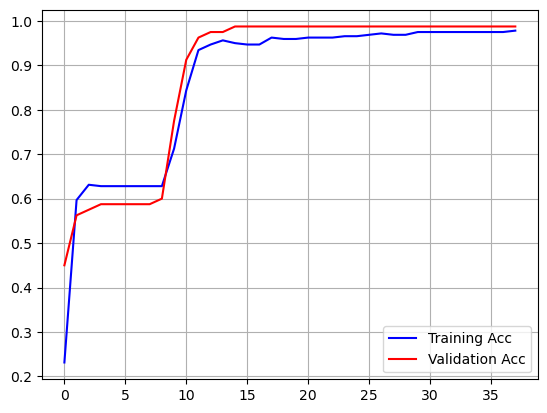

In [160]:
plt.plot(history.history["accuracy"],c='b')
plt.plot(history.history["val_accuracy"],c='r')
plt.grid()
plt.legend(["Training Acc","Validation Acc"])

import sklearn.metrics as metrics
import numpy as np
y_pred = model.predict(X_test)
#print(y_pred)
#y_pred = [1 if i > 0.5 else 0 for i in y_pred]
y_pred = np.argmax(y_pred, axis=1)
#print(y_pred)

acc = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average='macro')
recall = metrics.recall_score(y_test,y_pred,average='macro')

print(f'accuracy : {acc}')
print(f'precision : {precision}')
print(f'recall : {recall}')

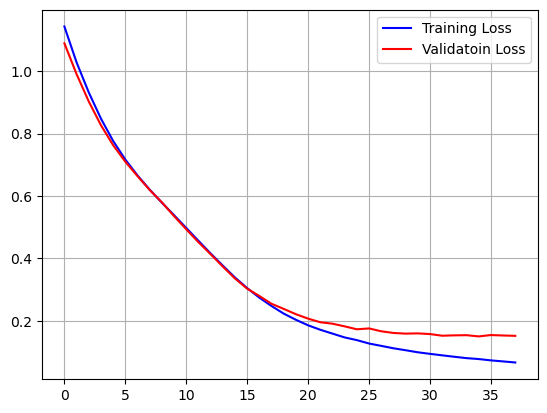

In [161]:
plt.plot(history.history['loss'],c = "b")
plt.plot(history.history["val_loss"],c ="r")
plt.grid()
plt.legend(["Training Loss","Validatoin Loss"])